In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [7]:
#Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

#Convert the target variable to binary (1 for diabetes, 0 for no diabetes )
y_binary = (y > np.median(y).astype(int))


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.4, random_state=42)

In [12]:
#Feature scaling
#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
#Train the Logistic Regression model
model = LogisticRegression(max_iter=300, tol=0.001, verbose=1, solver='liblinear')
model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(max_iter=300, solver='liblinear', tol=0.001, verbose=1)

In [16]:
#Evaluation metrics

#Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{:.2f}%".format(accuracy * 100))

Accuracy:79.10%


In [17]:
#Confusion matrix and Classification report

#evaluate the model
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix
 [[72 19]
 [18 68]]

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.79      0.80        91
        True       0.78      0.79      0.79        86

    accuracy                           0.79       177
   macro avg       0.79      0.79      0.79       177
weighted avg       0.79      0.79      0.79       177



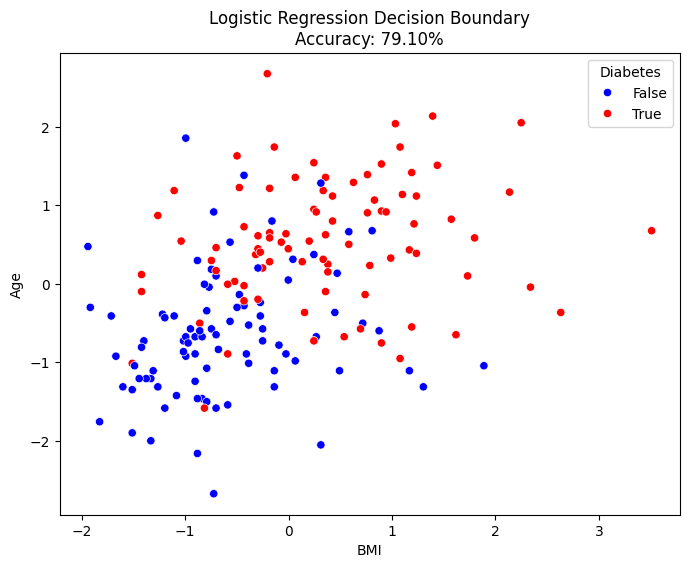

In [18]:
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
				0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()

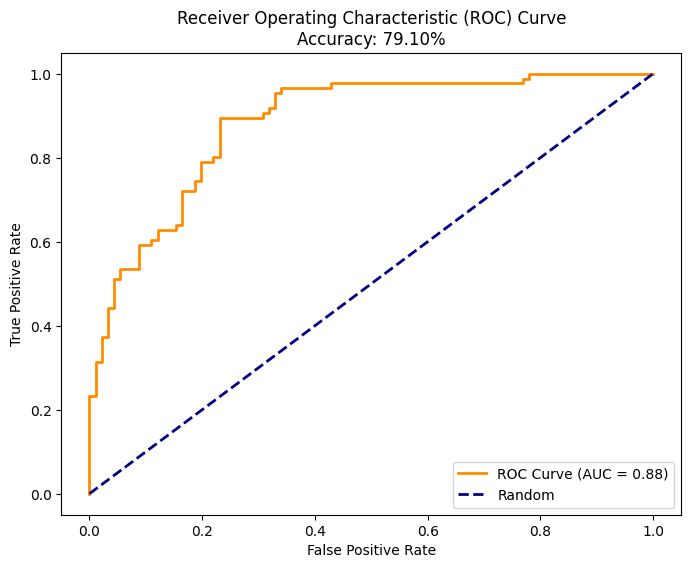

In [21]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	accuracy * 100))
plt.legend(loc="lower right")
plt.show()
